# <font color='yellow'>Projet machine learning : prédire le prix d'une maison</font>

## Algorithme utilisé pour la prédiction : régression linéaire multiple.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import numpy as np
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## <font color="green">Chargement du jeu de données</font>

Le jeu de données contient les prix de vente des maisons dans la région de Seattle. Des informations de nature temporelle, géographique, de qualité, etc. sont ajoutées pour chaque vente ce qui nous permet de construire un modèle prédictif. Ci-dessous la signification de chacune des colonnes du jeu de données.

<!-- ![title](dataset_columns_explanation.png) -->
<center><img src="./images/dataset_columns_explanation.png"/></center>

In [2]:
pd.set_option('display.max_columns', None)
df_all = pd.read_csv("kc_house_data.csv")

## <font color='green'>Séparation des jeux de données d'entraînement et de test</font>

In [3]:
y = df_all['price']
# X = df_all.drop('price',axis=1)
X = df_all.drop(['price'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=42)
df = X_train.join(y_train)

In [4]:
df.head(10)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
20359,7299600920,20141209T000000,4,2.50,2009,4800,2.0,0,0,3,8,2009,0,2012,0,98092,47.2586,-122.200,1798,4800,279000.0
10461,6056100295,20140530T000000,2,2.50,1240,1546,2.0,0,0,3,7,1240,0,2007,0,98108,47.5634,-122.298,1520,2468,330000.0
20047,9492500090,20140527T000000,3,2.50,2610,7256,2.0,0,0,3,9,2610,0,2014,0,98033,47.6950,-122.180,2610,7206,754950.0
10581,5379800810,20140807T000000,2,1.00,790,14200,1.0,0,0,3,7,790,0,1951,0,98188,47.4590,-122.285,1430,10000,198000.0
17749,7934000090,20150225T000000,2,1.00,690,5200,1.0,0,0,3,6,690,0,1918,0,98136,47.5560,-122.395,1380,5700,340000.0
19303,7237300610,20150303T000000,3,2.50,2200,5954,2.0,0,0,3,7,2200,0,2004,0,98042,47.3709,-122.125,2200,5046,315000.0
6571,3275760190,20140624T000000,4,1.75,1740,7700,1.0,0,0,5,7,1740,0,1968,0,98008,47.6259,-122.111,1740,8120,600000.0
15666,2767603165,20150122T000000,4,2.00,1980,4500,2.0,0,0,4,7,1980,0,1910,0,98107,47.6728,-122.379,1550,2541,500000.0
20017,1025039168,20140923T000000,1,0.75,740,1284,1.0,0,0,4,6,740,0,1928,0,98107,47.6741,-122.406,1430,3988,290000.0
5280,3856904970,20140818T000000,2,1.00,1120,4284,1.0,0,0,3,6,730,390,1921,0,98105,47.6688,-122.324,2050,4160,469000.0


Une rapide observation de ces données nous apprend qu'un travail de reformatage de la date sera nécessaire. Les autres données sont numériques. Elles sont donc utilisables par les algorithmes. A priori toutes les informations données dans ce dataset sont potentiellement pertinentes pour une modélisation.

## <font color='green'>Nettoyage des données</font>

#### 1) Recherche et traitement des doublons

In [5]:
print(df.duplicated().value_counts())

False    17290
dtype: int64


#### 2) Recherche et traitement des valeurs manquantes

In [6]:
print(df.isna().sum())

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64


In [7]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,1.729000e+04,17290.000000,17290.000000,17290.000000,1.729000e+04,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.000000,17290.00000,17290.000000,17290.000000,17290.000000,1.729000e+04
mean,4.587411e+09,3.368074,2.113736,2075.787565,1.493142e+04,1.490862,0.007403,0.234876,3.405090,7.651706,1783.201215,292.586350,1971.014054,85.422730,98078.103991,47.56035,-122.214560,1982.632273,12529.337941,5.379393e+05
std,2.884091e+09,0.936147,0.772997,914.384485,4.132372e+04,0.540887,0.085725,0.765499,0.647868,1.173546,822.574952,442.837661,29.281043,404.001472,53.574296,0.13890,0.140124,682.368114,26465.745201,3.606118e+05
min,1.200019e+06,0.000000,0.000000,380.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.15590,-122.519000,460.000000,651.000000,7.500000e+04
25%,2.122052e+09,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1952.000000,0.000000,98033.000000,47.47030,-122.329000,1480.000000,5100.000000,3.200000e+05
50%,3.904940e+09,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.57215,-122.231000,1830.000000,7635.000000,4.500000e+05
75%,7.322158e+09,4.000000,2.500000,2540.000000,1.068125e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,570.000000,1997.000000,0.000000,98118.000000,47.67860,-122.125000,2360.000000,10090.500000,6.420000e+05
max,9.842300e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.77760,-121.315000,6110.000000,871200.000000,6.885000e+06


#### 3) Reformatage des données (date en particulier)

In [8]:
df['date'].sort_values().unique()

array(['20140502T000000', '20140503T000000', '20140504T000000',
       '20140505T000000', '20140506T000000', '20140507T000000',
       '20140508T000000', '20140509T000000', '20140510T000000',
       '20140511T000000', '20140512T000000', '20140513T000000',
       '20140514T000000', '20140515T000000', '20140516T000000',
       '20140517T000000', '20140518T000000', '20140519T000000',
       '20140520T000000', '20140521T000000', '20140522T000000',
       '20140523T000000', '20140524T000000', '20140525T000000',
       '20140526T000000', '20140527T000000', '20140528T000000',
       '20140529T000000', '20140530T000000', '20140531T000000',
       '20140601T000000', '20140602T000000', '20140603T000000',
       '20140604T000000', '20140605T000000', '20140606T000000',
       '20140607T000000', '20140608T000000', '20140609T000000',
       '20140610T000000', '20140611T000000', '20140612T000000',
       '20140613T000000', '20140614T000000', '20140615T000000',
       '20140616T000000', '20140617T0000

La date correspond au jour de vente de la maison. Et on constate que ses valeurs s'étendent entre le 2 mai 2014 et le 27 mai 2015 (un peu plus d'un an). Une bonne idée est de transformer cette colonne de sorte qu'elle donne le nombre de jours qui s'est écoulé entre le 2 mai 2014 et le 27 mai 2015.

In [9]:
df['date'] = pd.to_datetime(df['date']) - pd.to_datetime(df['date']).min()
df['date'] = df['date'].dt.days

#### 4) Détection des valeurs aberrantes

In [10]:
df['bedrooms'].value_counts()

3     7861
4     5480
2     2243
5     1279
6      214
1      151
7       31
8       11
0       11
9        4
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [11]:
# On supprime la maison a 33 chambres qui est de toute évidence une erreur
df = df[df['bedrooms'] != 33]

In [12]:
df['sqft_lot'].describe(percentiles= [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    1.728900e+04
mean     1.493193e+04
std      4.132486e+04
min      5.200000e+02
1%       1.001760e+03
5%       1.793000e+03
10%      3.324400e+03
25%      5.040000e+03
50%      7.620000e+03
75%      1.068200e+04
90%      2.118300e+04
95%      4.236580e+04
99%      2.126833e+05
max      1.651359e+06
Name: sqft_lot, dtype: float64

On remarque ici que l'évolution des surfaces explose dans le dernier pourcent des valeurs les plus élevées. Ce qui laisse présager la présence de valeurs aberrantes. À voir lors de l'analyse bivariée.

In [13]:
df['bathrooms'].describe(percentiles= [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.995, 0.999, 0.9999])

count     17289.000000
mean          2.113757
std           0.773014
min           0.000000
1%            1.000000
5%            1.000000
10%           1.000000
25%           1.500000
50%           2.250000
75%           2.500000
90%           3.000000
95%           3.500000
99%           4.250000
99.5%         4.500000
99.9%         5.500000
99.99%        7.021200
max           8.000000
Name: bathrooms, dtype: float64

#### 5) Détection des colonnes marginales

In [14]:
df['waterfront'].value_counts()

0    17161
1      128
Name: waterfront, dtype: int64

Très peu de valeurs différentes de 0, il pourra être intéressant de combiner cette colonne avec une autre.

#### 6) Sources de data leakage et suppression des données en conséquence

Les colonnes sqft_living15 et sqft_lot15 contiennent en elles-mêmes des informations sur les superficies des 15 maisons premières voisines. Et contiennent par conséquent en puissance des données du jeu de données de test. Une information qui n'est en général pas connue lors d'une vente, ces informations sont très probablement calculées à partir des données du dataset. Conclusion : colonnes à supprimer. 

In [15]:
df = df.drop(['sqft_living15', 'sqft_lot15'], axis=1)

#### Remarque

On peut s'amuser à recalculer pour le jeu de données d'entraînement seulement l'équivalent de sqft_living15 mais avec un nombre n de voisins que l'on veut. Et on obtient l'évolution des corrélations (r de Pearson) entre le prix et sqft_livingN calculées. On observe nettement l'existence d'un maximum.

<center><img src="./images/correlations_prix_sqft_living_nb_voisins_lin_200.png"/></center>

#### 7) Recherche de combinaisons linéaires dans les données.

In [16]:
# En principe, pas besoin de tout tester. Mais on remarque assez vite que sqft_living, sqft_above et sqft_basement sont liés linéairement.
(df['sqft_living'] == df['sqft_above'] + df['sqft_basement']).value_counts()

True    17289
dtype: int64

In [17]:
# On décide de supprimer sqft_basement
df = df.drop(['sqft_basement'], axis=1)

In [18]:
# On supprime aussi l'identifiant qui est inutile ici
df = df.drop(['id'], axis=1)

## <font color='green'>Analyse des données</font>

### La cible

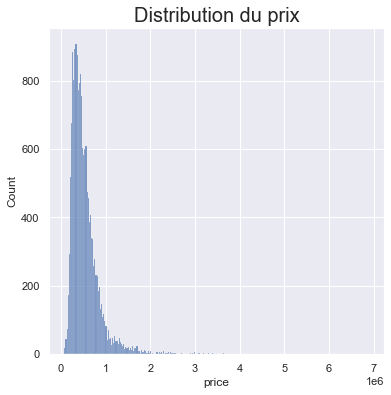

In [19]:
sns.set(rc={'figure.figsize':(6,6)})
price_hist_plot = sns.histplot(x='price', data=df).set_title('Distribution du prix', fontdict={'fontsize':20})
# price_hist_plot.set(xlim=(0, 4e6))

[(0.998, 1.0)]

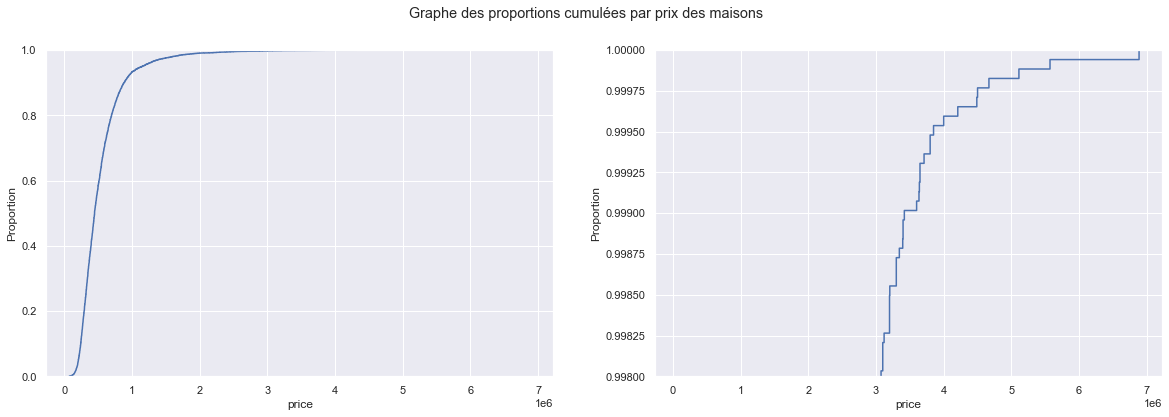

In [20]:
fig, ax = plt.subplots(1,2, figsize=(20, 6))
plt.suptitle('Graphe des proportions cumulées par prix des maisons')
sns.ecdfplot(ax=ax[0],x='price',data=df)
sns.ecdfplot(ax=ax[1],x='price',data=df)
ax[1].set(ylim=(0.998, 1))

On observe que seules neuf maisons dépasse le prix de 4,000,000 de dollars.

## Analyse univariée

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

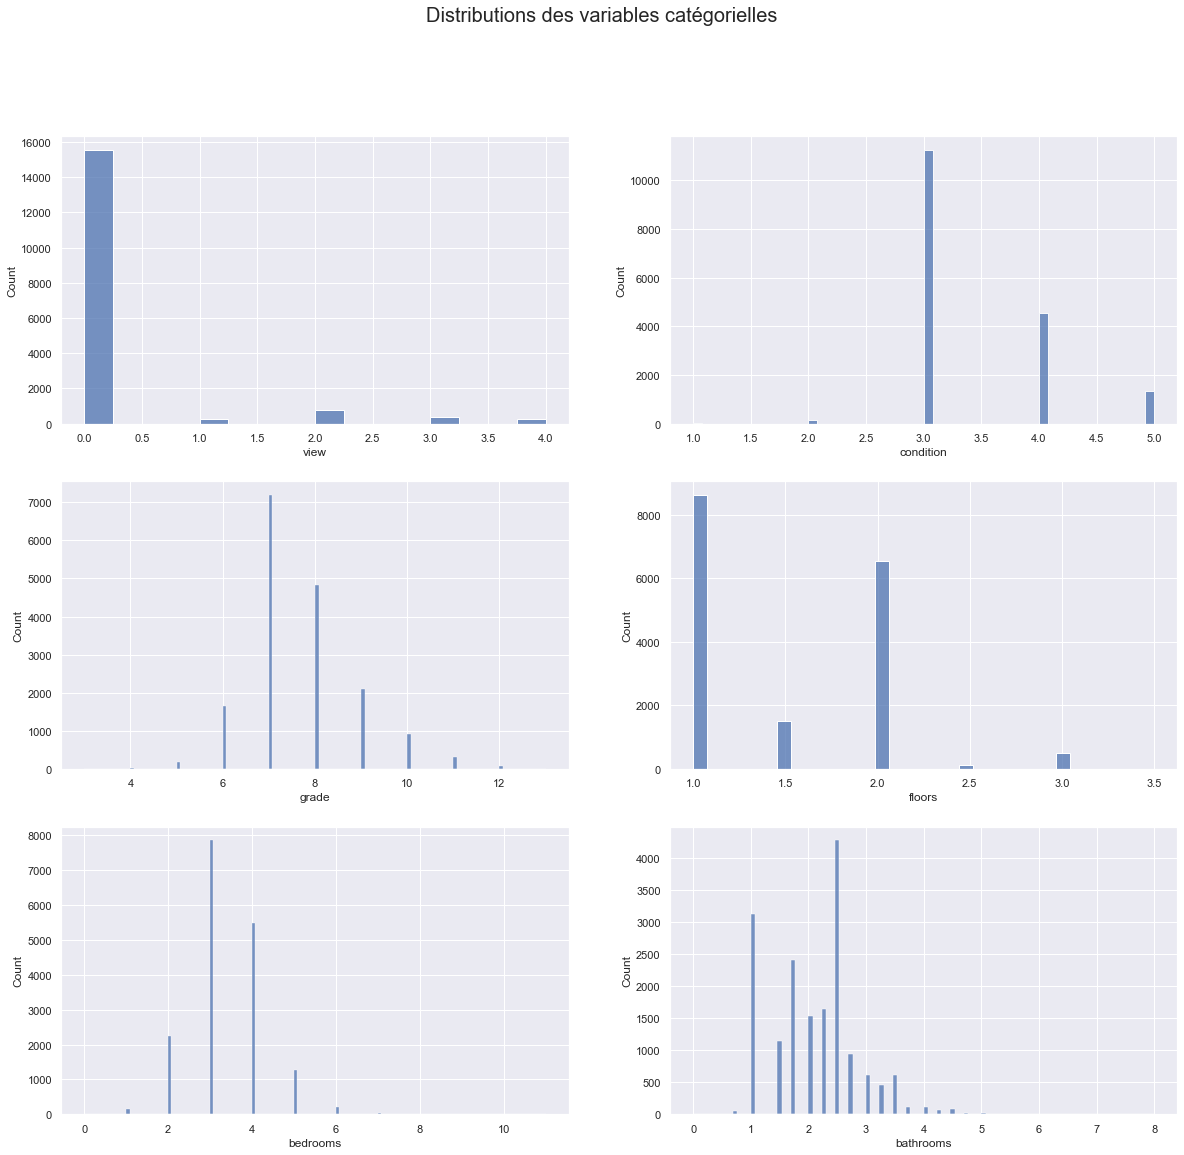

In [21]:
fig, ax = plt.subplots(3,2, figsize=(20, 18))
plt.suptitle('Distributions des variables catégorielles', fontsize=20)
sns.histplot(ax=ax[0,0],x='view',data=df)
sns.histplot(ax=ax[0,1],x='condition', data=df)
sns.histplot(ax=ax[1,0],x='grade', data=df)
sns.histplot(ax=ax[1,1],x='floors', data=df)
sns.histplot(ax=ax[2,0],x='bedrooms', data=df)
sns.histplot(ax=ax[2,1],x='bathrooms', data=df)

Text(0.5, 1.0, 'Distribution de waterfront')

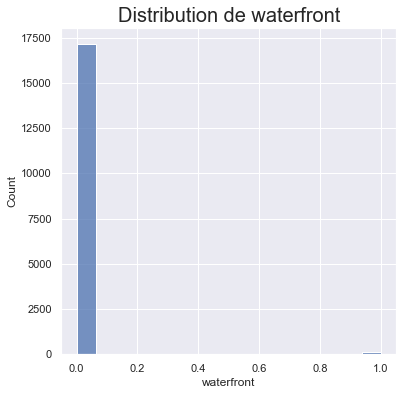

In [22]:
sns.histplot(x='waterfront',data=df).set_title('Distribution de waterfront', fontdict={'fontsize': 20})

On remarque que le nombre de maisons ayant une vue sur la mer est très petit.

In [23]:
df[df['waterfront'] == 1]['view'].value_counts()

4    106
3     14
2      7
1      1
Name: view, dtype: int64

## Analyse bivariée

## Étude du lien des variables catégorielles avec le prix.

##### Waterfront et prix

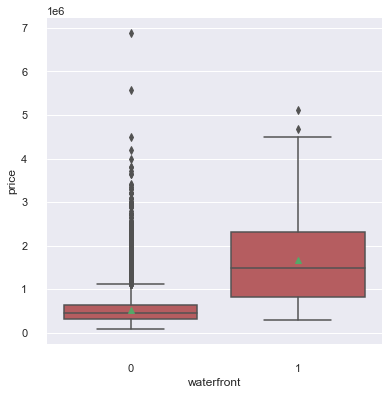

In [24]:
sns.boxplot(x="waterfront", y="price", data=df, palette=["r"], showmeans=True)
sns.despine(offset=10, trim=True)

On observe qu'en moyenne les maisons en bord de mer coûtent trois fois plus cher que les maisons loin de la mer. Au vu du nombre de maisons en bord de mer par rapport au nombre total de maisons on peut essayer de fusionner la colonne avec une autre par exemple view.

##### View et prix

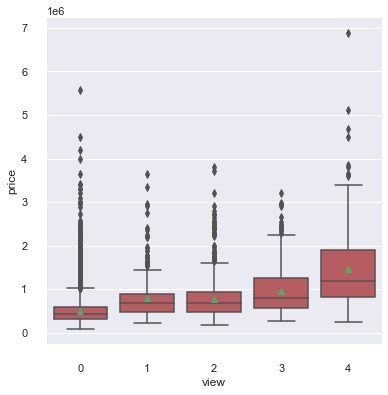

In [25]:
plot_view_box = sns.boxplot(x="view", y="price", data=df, palette=["r"], showmeans=True)
sns.despine(offset=10, trim=True)

Les informations de waterfront se retrouvent presque complètement dans les view 3 et 4. Un très bon argument en faveur de la fusion de ces deux variables. Ce choix aura également l'avantage de simplifier le modèle.

##### Condition et prix

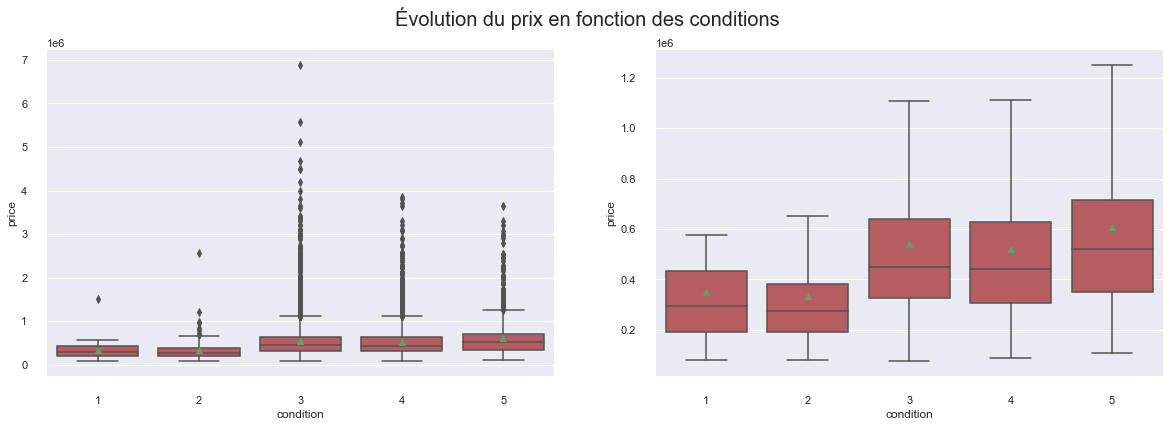

In [26]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
plt.suptitle('Évolution du prix en fonction des conditions', fontsize=20)
sns.boxplot(ax= ax[0], x="condition", y="price", data=df, palette=["r"], showmeans=True)
sns.boxplot(ax= ax[1], x="condition", y="price", data=df, palette=["r"], showmeans=True, showfliers=False)
sns.despine(offset=10, trim=True)
# condition_box_plot.set(ylim=(0, 1.5e6))

Globalement le prix moyen croît avec les conditions.

##### Floors et prix

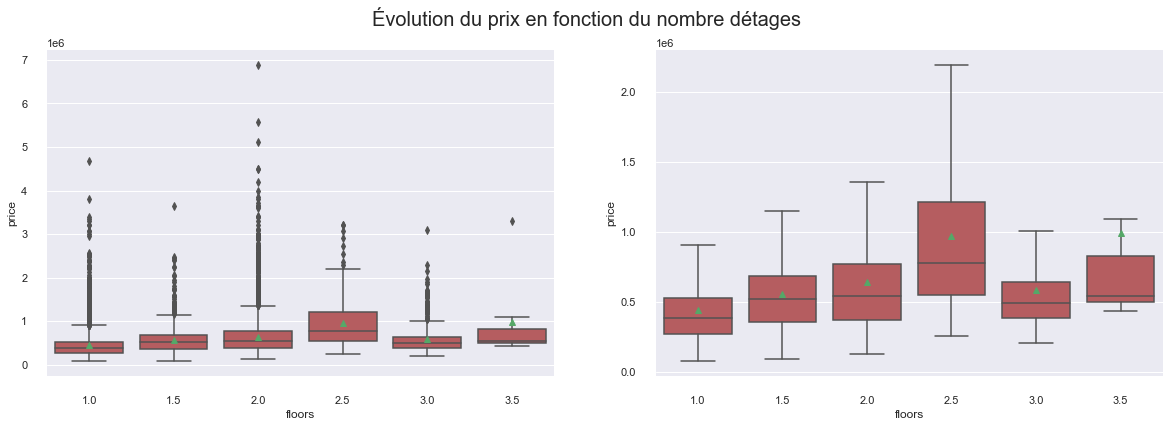

In [27]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
plt.suptitle('Évolution du prix en fonction du nombre d''étages', fontsize=20)
sns.boxplot(ax=ax[0], x="floors", y="price", data=df, palette=["r"], showmeans=True)
sns.boxplot(ax=ax[1], x="floors", y="price", data=df, palette=["r"], showmeans=True, showfliers=False)
sns.despine(offset=10, trim=True)

On observe d'abord une croissance du prix moyen avec le nombre d'étages puis une chute soudaine à partir de 3 étages.

In [28]:
df['floors'].value_counts()

1.0    8621
2.0    6540
1.5    1500
3.0     496
2.5     125
3.5       7
Name: floors, dtype: int64

##### Bathrooms et prix

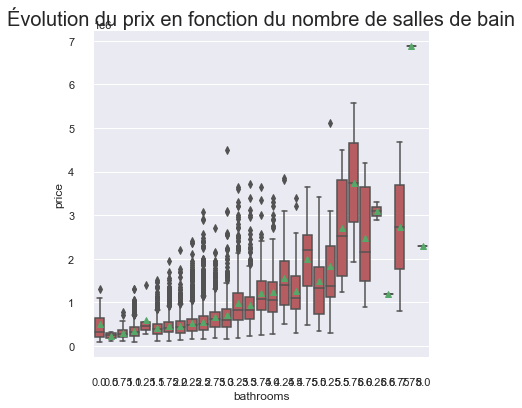

In [29]:
sns.boxplot(x="bathrooms", y="price", data=df, palette=["r"], showmeans=True).set_title('Évolution du prix en fonction du nombre de salles de bain', fontdict={'fontsize':20})
sns.despine(offset=10, trim=True)

Plus le nombre de chambres est élevé plus le prix l'est aussi, l'allure semble être quadratique ou exponentielle.

Bedrooms et prix

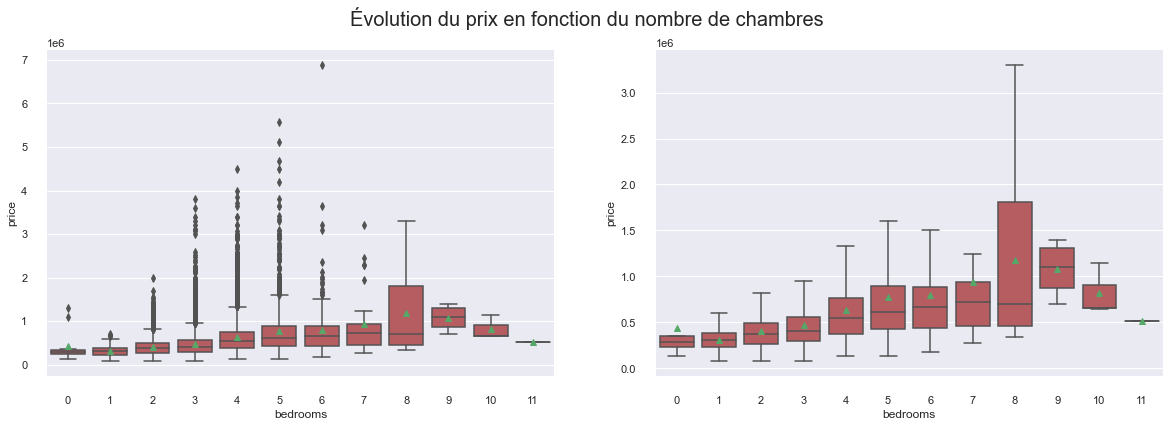

In [30]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
plt.suptitle('Évolution du prix en fonction du nombre de chambres', fontsize=20)
sns.boxplot(ax=ax[0], x="bedrooms", y="price", data=df, palette=["r"], showmeans=True)
sns.boxplot(ax=ax[1], x="bedrooms", y="price", data=df, palette=["r"], showmeans=True, showfliers=False)
sns.despine(offset=10, trim=True)

À nouveau on observe une corrélation évidente avec le prix. Plus le nombre de chambres est élevé plus le prix l'est aussi en moyenne.

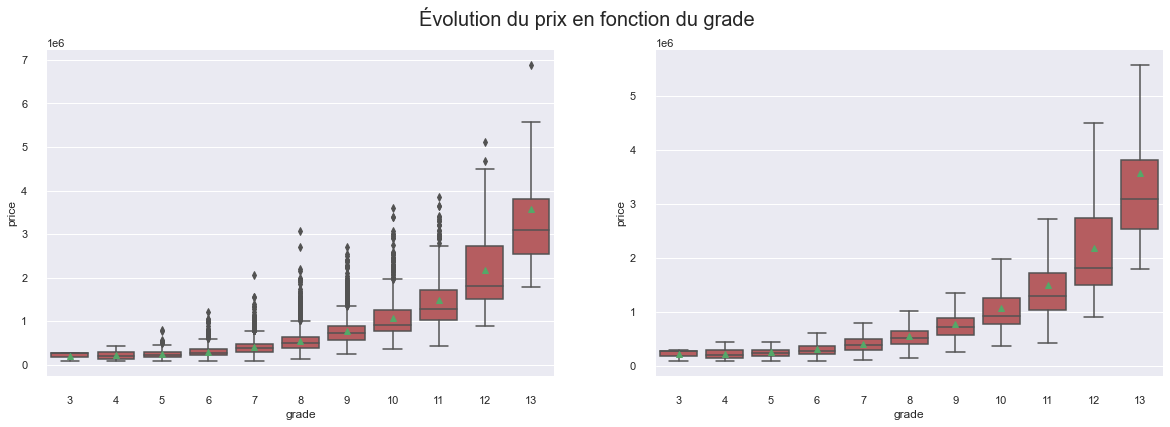

In [31]:
fig, ax = plt.subplots(1,2,figsize=(20,6))
plt.suptitle('Évolution du prix en fonction du grade', fontsize=20)
sns.boxplot(ax=ax[0], x="grade", y="price", data=df, palette=["r"], showmeans=True)
sns.boxplot(ax=ax[1], x="grade", y="price", data=df, palette=["r"], showmeans=True, showfliers=False)
sns.despine(offset=10, trim=True)

Magnifique évolution non-linéaire du grade avec le prix. Il s'agit a priori d'une feature à haut potentiel de prédiction. Les comportements que l'on a vu précédemment est une incitation forte à polynomialiser nos données.

### Résumé des corrélations des variables catégorielles avec le prix.

<AxesSubplot:>

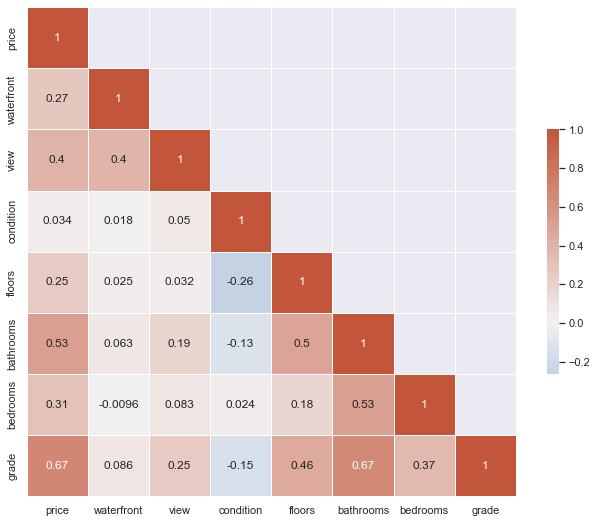

In [74]:
# Calcul de la matrice de corrélation
corr = df[["price", "waterfront", "view", "condition", "floors", "bathrooms", "bedrooms", "grade"]].corr()

# Sélection du triangle inférieur gauche de la matrice de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool),1)

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

Toutes les variables étudiées jusqu'à présent, à l'exception de condition sont assez fortement ou fortement corrélées avec le prix. Mais attention à l'interprétation car il s'agit du coefficient de corrélation linéaire et on a vu que les relations étaient plutôt de nature non-linéaire.

In [33]:
df['condition'].value_counts()

3    11261
4     4534
5     1329
2      140
1       25
Name: condition, dtype: int64

In [34]:
# On applique le test ANOVA pour tester l'indépendance de condition avec le prix.
stats.f_oneway(df['price'][df['condition'] == 1],
               df['price'][df['condition'] == 2],
               df['price'][df['condition'] == 3],
               df['price'][df['condition'] == 4],
               df['price'][df['condition'] == 5])

F_onewayResult(statistic=28.756896029321364, pvalue=7.400368536923897e-24)

## Étude du lien des variables continues avec le prix
#### On étudiera les variables géographiques et temporelles à part.

##### sqft_living et prix

In [35]:
moyenne_sqft_living = []
price_moyenne_living = []
intervalle = 50
nb = math.ceil(max(df['sqft_living'])/intervalle)
for i in range(1, nb):
    moyenne_sqft_living.append(df[(df['sqft_living'] > intervalle*(i-1)) & (df['sqft_living'] < intervalle*(i))]['sqft_living'].mean())
    price_moyenne_living.append(df[(df['sqft_living'] > intervalle*(i-1)) & (df['sqft_living'] < intervalle*(i))]['price'].mean())
moyenne_sqft_living =[moy for moy in moyenne_sqft_living if str(moy) != 'nan']
price_moyenne_living =[moy for moy in price_moyenne_living if str(moy) != 'nan']

Text(0, 0.5, 'moyenne price')

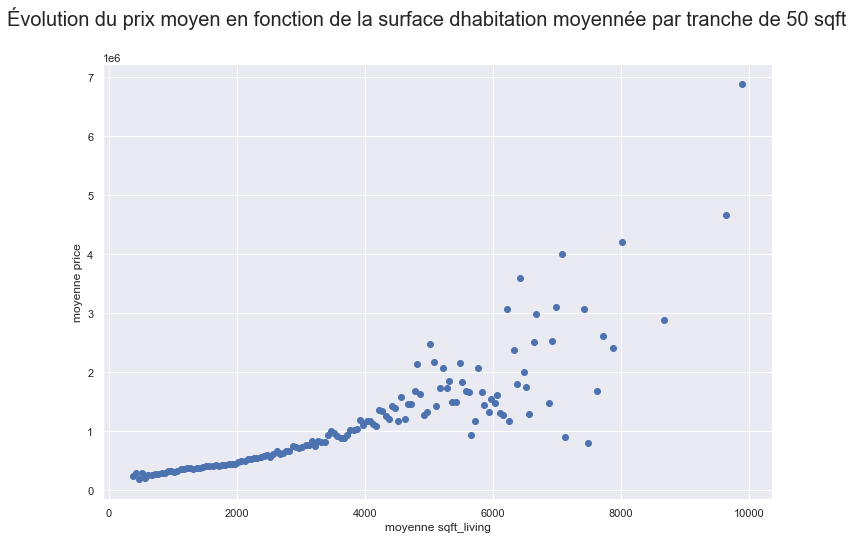

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
plt.suptitle('Évolution du prix moyen en fonction de la surface d''habitation moyennée par tranche de 50 sqft', fontsize=20)
plt.scatter(moyenne_sqft_living,price_moyenne_living)
plt.xlabel('moyenne sqft_living')
plt.ylabel('moyenne price')

Le prix moyen croît avec la surface habitable des maisons. La dispersion est très grande au-dessus de 5500 sqft.

##### sqft_above et prix

In [37]:
moyenne_sqft_above = []
price_moyenne_above = []
intervalle = 50
nb = math.ceil(max(df['sqft_above'])/intervalle)
for i in range(1, nb):
    # moyenne_sqft_above.append(df[(df['sqft_above'] > intervalle*(i-1)) & (df['sqft_above'] < intervalle*(i))]['sqft_above'].mean())
    moyenne_sqft_living.append((df[(df['sqft_living'] > intervalle*(i-1)) & (df['sqft_living'] < intervalle*(i))]['sqft_living']**2).mean())
    price_moyenne_above.append(df[(df['sqft_above'] > intervalle*(i-1)) & (df['sqft_above'] < intervalle*(i))]['price'].mean())
moyenne_sqft_above =[moy for moy in moyenne_sqft_above if str(moy) != 'nan']
price_moyenne_above =[moy for moy in price_moyenne_above if str(moy) != 'nan']

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
plt.suptitle('Évolution du prix moyen en fonction de la surface d''habitation sans prise en compte du sous-sol moyennée par tranche de 50 sqft', fontsize=20)
plt.scatter(moyenne_sqft_above,price_moyenne_above)
plt.xlabel('moyenne sqft_above')
plt.ylabel('moyenne price')

##### sqft_lot et prix

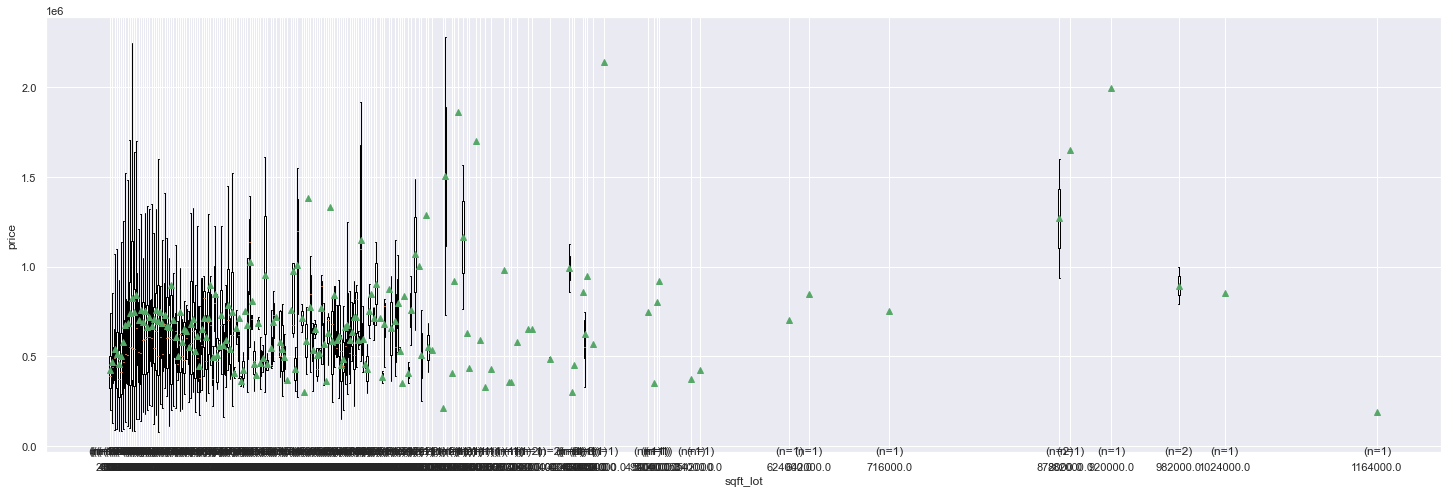

In [ ]:
fig, ax = plt.subplots(figsize=(25,8))
taille_classe = 2000 # taille des classes pour la discrétisation

groupes = [] # va recevoir les données agrégées à afficher

# on calcule des tranches allant de 0 au solde maximum par paliers de taille taille_classe
tranches = np.arange(0, max(df["sqft_lot"]), taille_classe)
tranches = tranches + taille_classe/2 # on décale les tranches d'une demi taille de classe
indices = np.digitize(df["sqft_lot"], tranches) # associe chaque solde à son numéro de classe


for ind, tr in enumerate(tranches): # pour chaque tranche, ind reçoit le numéro de tranche et tr la tranche en question
    price = df.loc[indices==ind,"price"] # sélection des individus de la tranche ind
    if len(price) > 0:
        g = {
            'valeurs': price,
            'centre_classe': tr-(taille_classe/2),
            'taille': len(price),
            'quartiles': [np.percentile(price,p) for p in [25,50,75]]
        }
        groupes.append(g)

# affichage des boxplots
plt.boxplot([g["valeurs"] for g in groupes],
            positions= [g["centre_classe"] for g in groupes], # abscisses des boxplots
            showfliers= False, # on ne prend pas en compte les outliers
            widths= taille_classe*0.7,
            showmeans = True # largeur graphique des boxplots
)

# affichage des effectifs de chaque classe
for g in groupes:
    plt.text(g["centre_classe"],0,"(n={})".format(g["taille"]),horizontalalignment='center',verticalalignment='top')     
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.show()

8 points au-dessus de 715000 pieds-carrés, une corrélation n'est pas évidente avec le prix.

<AxesSubplot:>

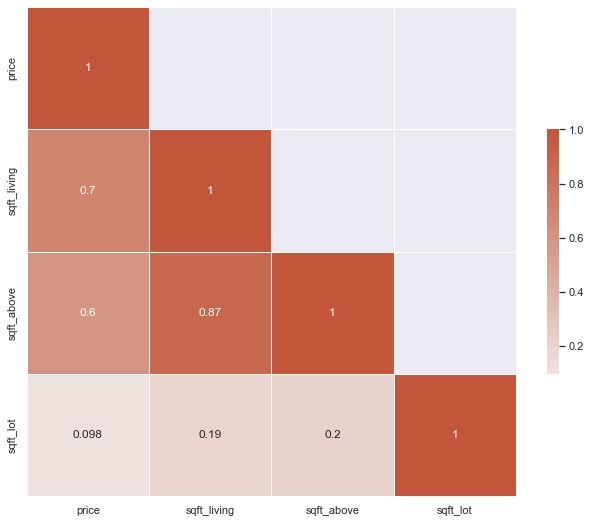

In [ ]:
# Calcul de la matrice de corrélation
corr = df[["price", "sqft_living", "sqft_above", "sqft_lot"]].corr()

# Sélection du triangle inférieur gauche de la matrice de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool),1)

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

Fortes corrélations de sqft_living et sqft_above avec le prix comme on s'y attendait. La corrélation entre le prix et sqft_lot est cependant moindre mais reste suffisante pour que l'on choisisse d'intégrer sqft_lot dans le modèle.

## Étude du lien des variables temporelles avec le prix

##### Date et prix

[(0.0, 1100000.0)]

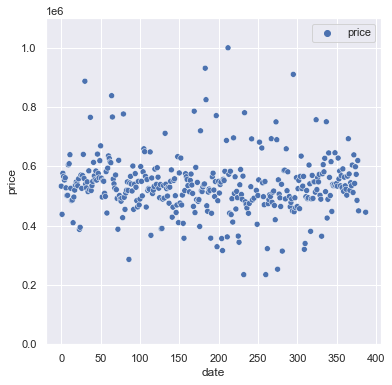

In [ ]:
date_price = df[['date','price']].groupby(['date']).mean()

ax = sns.scatterplot(data=(date_price))
ax.set(xlabel='date', ylabel='price')
ax.set(ylim = [0,1.1e6])

Il ne semble pas y avoir de corrélation entre le prix et date. Il n'est pas certain que ces variations se répêtent d'année en année. Un test de Pearson permettra de trancher.

In [ ]:
r_pvalue = stats.pearsonr(df['price'],df['date'])
print('Le coefficient de corrélation linéaire entre le prix et date est de : ' + str(r_pvalue[0]) + '.')
print('La p-value associée au test est de : ' + str(r_pvalue[1]) + '.')


Le coefficient de corrélation linéaire entre le prix et date est de : -0.006288942143093047.
La p-value associée au test est de : 0.4083669330296577.


La p-value qui ressort du test est très élevée, l'hypothèse d'indépendance de date avec le prix est confirmée. On choisit de supprimer date.

##### yr_build + yr_renovated et prix

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

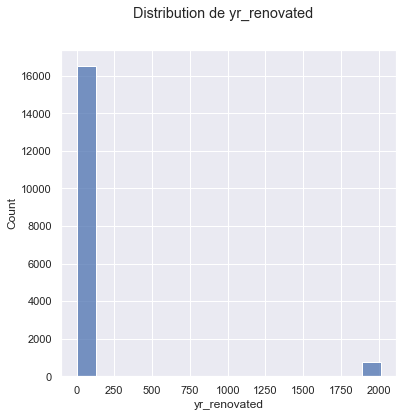

In [ ]:
plt.suptitle('Distribution de yr_renovated')
sns.histplot(x='yr_renovated', data=df)

Il est pertinent là aussi comme on l'a fait avec waterfront de combiner yr_renovated avec yr_build. On choisit de remplacer toutes les valeurs de yr_build par les valeurs de yr_renovated là où elles sont non-nulles.

In [ ]:
def create_yr_combined(df):
    yr_combined = df['yr_built'].copy()
    yr_renovated = df[df['yr_renovated'] != 0]['yr_renovated'].reset_index()
    index = yr_renovated['index']
    yr = yr_renovated['yr_renovated']
    for i in range(0,len(index)):
        yr_combined[index[i]] = yr[i]
    df['yr_combined'] = yr_combined

create_yr_combined(df)

<AxesSubplot:xlabel='yr_combined'>

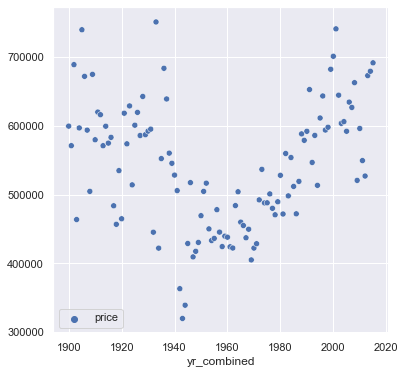

In [ ]:
yr_built_price = df[['yr_combined','price']].groupby(['yr_combined']).mean()

sns.scatterplot(data=(yr_built_price))

Une belle structure quadratique est visible entre le prix d''une maison et l'année de construction/rénovation. Cette structure est très probablement visible dans le jeu de données de test. Il pourra être pertinent de polynomialiser à l'ordre deux les features.

## Étude du lien des variables géographiques avec le prix

##### Long et prix

In [ ]:
moyenne_long = []
price_moyenne_long = []
intervalle = 0.01
nb = math.ceil(max(-df['long'])/intervalle)
for i in range(1, nb):
    moyenne_long.append(df[(-df['long'] > intervalle*(i-1)) & (-df['long'] < intervalle*(i))]['long'].mean())
    price_moyenne_long.append(df[(-df['long'] > intervalle*(i-1)) & (-df['long'] < intervalle*(i))]['price'].mean())
moyenne_long =[moy for moy in moyenne_long if str(moy) != 'nan']
price_moyenne_long =[moy for moy in price_moyenne_long if str(moy) != 'nan']

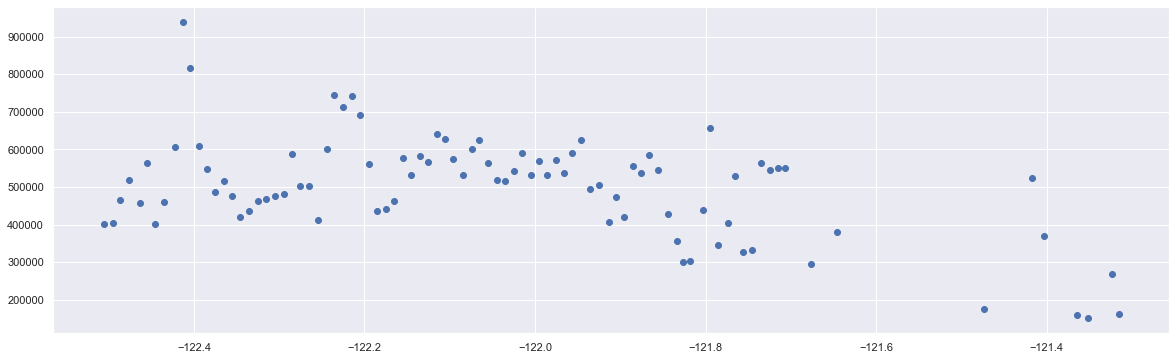

In [ ]:
fig, axes = plt.subplots(figsize=[20,6])
plt.scatter(moyenne_long,price_moyenne_long)

##### Lat et prix

In [ ]:
moyenne_lat = []
price_moyenne_lat = []
intervalle = 0.01
nb = math.ceil(max(df['lat'])/intervalle)
for i in range(1, nb):
    moyenne_lat.append(df[(df['lat'] > intervalle*(i-1)) & (df['lat'] < intervalle*(i))]['lat'].mean())
    price_moyenne_lat.append(df[(df['lat'] > intervalle*(i-1)) & (df['lat'] < intervalle*(i))]['price'].mean())
moyenne_lat =[moy for moy in moyenne_lat if str(moy) != 'nan']
price_moyenne_lat =[moy for moy in price_moyenne_lat if str(moy) != 'nan']

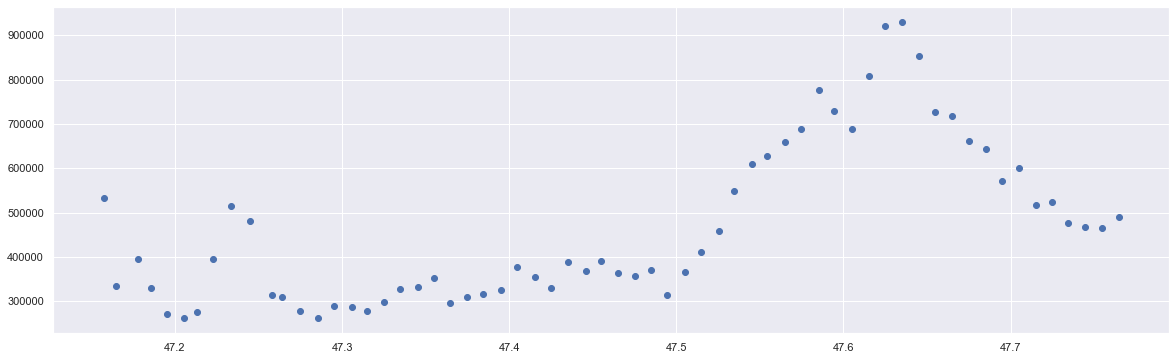

In [ ]:
fig, axes = plt.subplots(figsize=[20,6])
plt.scatter(moyenne_lat,price_moyenne_lat)

Très belles structures. Il y a toutes les chances de retrouver ces structures dans le jeu de données du test. On peut donc extraire de la corrélation avec le prix en encodant la feature lat.

##### Zipcode et prix

In [ ]:
px.scatter_mapbox(df, lat=df.lat, lon=df.long, mapbox_style="open-street-map", color=df.zipcode)

L'ordre donnée dans les zipcodes résulte de l'Histoire de la ville. Mais on sait que dans une ville les prix peuvent varier d'un territoire à l'autre et d'autant plus s'il s'agit d'une grande ville comme Seattle et de sa banlieue. Une idée est de réorganiser les zipcodes par ordre de prix moyen croissant et d'en tirer une nouvelle feature plus corrélée avec le prix. Si une structure apparaît, elle sera très probablement présente aussi dans le jeu de données de test.

## <font color='green'>Transformation de features</font>

On définit les fonctions qui permettent de construire ces nouvelles features, on prend bien soin de ne pas polluer le dataset de test avec des informations du jeu d'entraînement.

In [ ]:
def convert_date(df):
    df['date'] = pd.to_datetime(df['date']) - pd.to_datetime(df['date']).min()
    df['date'] = df['date'].dt.days

def waterfront_view(df):
    df['waterfront_view'] = df['waterfront'] + df['view']

def create_yr_combined(df):
    yr_combined = df['yr_built'].copy()
    yr_renovated = df[df['yr_renovated'] != 0]['yr_renovated'].reset_index()
    index = yr_renovated['index']
    yr = yr_renovated['yr_renovated']
    for i in range(0,len(index)):
        yr_combined[index[i]] = yr[i]
    df['yr_combined'] = yr_combined
    
def encode_yr(df):
    df['yr_encoded'] = df['yr_combined']
    df.loc[df['yr_combined'] < 1940, 'yr_encoded'] = 1
    df.loc[(df['yr_combined'] >= 1940) & (df['yr_combined'] < 1980), 'yr_encoded'] = 0
    df.loc[(df['yr_combined'] >= 1980), 'yr_encoded'] = 1

def encode_lat(df):
    df['lat_encoded'] = df['lat']
    df.loc[df['lat'] < 47.26, 'lat_encoded'] = int(1)
    df.loc[(df['lat'] >= 47.26) & (df['lat'] < 47.50), 'lat_encoded'] = int(0)
    df.loc[(df['lat'] >= 47.50) & (df['lat'] < 47.54), 'lat_encoded'] = int(1)
    df.loc[(df['lat'] >= 47.54) & (df['lat'] < 47.68), 'lat_encoded'] = int(2)
    df.loc[df['lat'] >= 47.68, 'lat_encoded'] = int(1)

def reorganize_zipcode(df,X):
    zipcodes = df['zipcode'].sort_values().unique()
    price_zipcodes = [df[df['zipcode'] == zipcode]['price'].mean() for zipcode in zipcodes]
    price_zipcodes, zipcodes = zip(*sorted(zip(price_zipcodes, zipcodes)))
    X['zipcode_new'] = X['zipcode']
    for i, zipcode in enumerate(zipcodes):
        X.loc[X['zipcode'] == zipcode, 'zipcode_new'] = i

In [ ]:
waterfront_view(df)

In [ ]:
encode_yr(df)
encode_lat(df)

In [ ]:
df.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,price,yr_combined,zipcode_new,yr_encoded,lat_encoded
20359,221,4,2.5,2009,4800,2.0,0,0,3,8,2009,2012,0,98092,47.2586,-122.200,279000.0,2012,16,1,1.0
10461,28,2,2.5,1240,1546,2.0,0,0,3,7,1240,2007,0,98108,47.5634,-122.298,330000.0,2007,19,1,2.0
20047,25,3,2.5,2610,7256,2.0,0,0,3,9,2610,2014,0,98033,47.6950,-122.180,754950.0,2014,60,1,1.0
10581,97,2,1.0,790,14200,1.0,0,0,3,7,790,1951,0,98188,47.4590,-122.285,198000.0,1951,6,0,0.0
17749,299,2,1.0,690,5200,1.0,0,0,3,6,690,1918,0,98136,47.5560,-122.395,340000.0,1918,39,1,2.0


[Text(0.5, 0, 'zipcode'), Text(0, 0.5, 'price')]

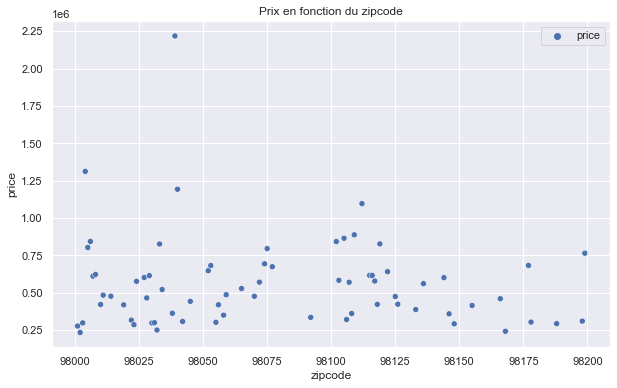

In [ ]:
sns.set(rc={'figure.figsize':(10,6)})
zipcode_price = df[['zipcode','price']].groupby(['zipcode']).mean()
ax = sns.scatterplot(data=zipcode_price)
ax.set(title='Prix en fonction du zipcode')
ax.set(xlabel='zipcode', ylabel='price')

[Text(0.5, 0, 'zipcode_new'), Text(0, 0.5, 'price')]

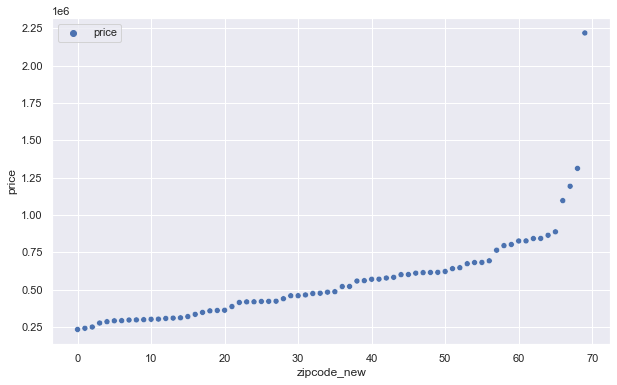

In [ ]:
reorganize_zipcode(df,df)
zipcode_price = df[['zipcode_new','price']].groupby(['zipcode_new']).mean()

sns.set(rc={'figure.figsize':(10,6)})
ax = sns.scatterplot(data=(zipcode_price))
ax.set(xlabel='zipcode_new', ylabel='price')
# ax.set(ylim = [0,1.1e6])

<AxesSubplot:>

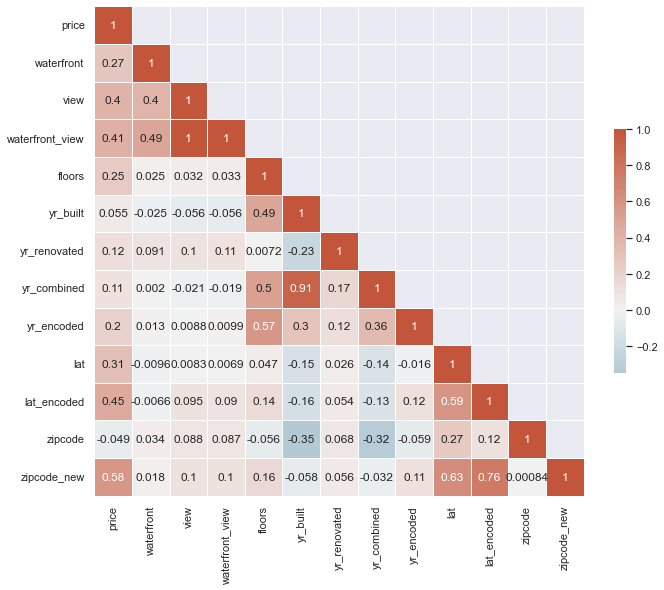

In [ ]:
# Calcul de la matrice de corrélation
corr = df[['price', 'waterfront', 'view', 'waterfront_view', 'floors', 'yr_built', 'yr_renovated', 'yr_combined', 'yr_encoded', 'lat', 'lat_encoded', 'zipcode', 'zipcode_new']].corr()

# Sélection du triangle inférieur gauche de la matrice de corrélation
mask = np.triu(np.ones_like(corr, dtype=bool),1)

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

## Analyse trivariée

C:\Users\micka\AppData\Local\Temp\ipykernel_14076\3790690288.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  floors_combined = df.groupby('yr_combined')['floors','price'].mean().reset_index()


<AxesSubplot:xlabel='yr_combined', ylabel='floors'>

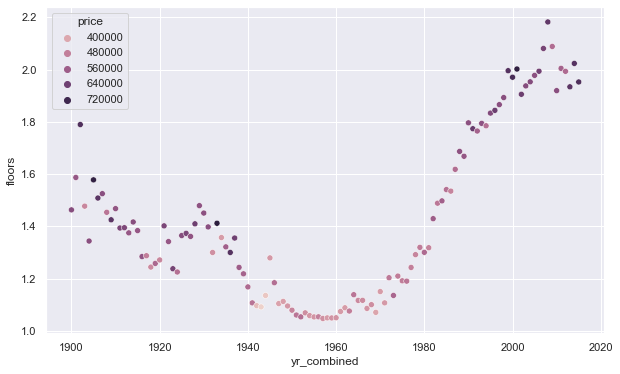

In [ ]:
floors_combined = df.groupby('yr_combined')['floors','price'].mean().reset_index()

sns.scatterplot(x='yr_combined',y='floors',data=floors_combined, hue='price')

On observe sur ce graphique que le nombre d'étages des maisons vendues est partitionnée en fonction de l'année de construction (rénovation). Avant l'année 1980, les maisons étaient construites pour la plupart avec un étage ou un étage et demi et après 1980 avec deux étages ou plus. Le fait qu'il y ait moins d'étages pour les maisons construites autour de 1960 explique en partie le creux observé.